<a href="https://colab.research.google.com/github/JK88-1337/Emotion-Classification-using-Tweets/blob/DylanXiao/Final_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Abstract**

Emotions play a crucial role in human communication, influencing decisions, behaviors, and social interactions. In today's digital age, people frequently express their feelings through short textual posts on social media platforms like Twitter. However, interpreting these emotions is a challenging task for machines due to the brevity, informal language, sarcasm, and contextual dependencies often found in such texts.

# **1. Introduction (Problem Statement)**

a. Background:
    Tweets express emotions in subtle, varied ways, often shaped by personal and cultural context. This makes automatic recognition challenging, especially in informal online language.

b. Significance:
    Accurate emotion detection in tweets supports public opinion analysis and mental health applications.

c. Key Challenge:
    Capturing nuanced emotions is difficult—The main challenges are the highly imbalanced emotion distribution, the short and noisy nature of tweets, and the difficulty of accurately recognizing subtle emotions, especially for rare classes.
    
d. Our Aim:
    Our aim is to compare CNN, BiLSTM, and advanced transformers (RoBERTa/DeBERTa) models to identify the most effective architecture for emotion classification in tweets. Based on the best-performing model, we further incorporate attention pooling and class balancing techniques to better capture subtle emotional cues and improve recognition of both common and rare emotions in real-world social media data.

# **2. Related Work (Literature Review)**

## 2.1 Reproduce the paper "Extracting and Classifying Sentiment from Twitter" (Baseline)
The referenced article adopts the classic approach of traditional NLP text classification tasks. The CNN/BiLSTM model structure is clear, easy to understand, and quick to learn. Its advantages include low computing resource requirements, good code readability and usability, making it suitable for small datasets and resource-constrained scenarios.

This experiment compares sentiment classification models based on convolutional neural networks (CNN) and bidirectional long short-term memory networks (BiLSTM). Both models were trained and evaluated under the same pre-processing process, data splitting approach, and model parameters (such as word vector dimension, batch size, number of training iterations, etc.) to ensure the fairness and comparability of the experiment.

First, from the accuracy curves of the training and validation sets, it can be seen that the CNN model converges faster in the early stages of training, with a significant increase in accuracy, and achieves a high accuracy rate at an earlier stage. Overall, the CNN model demonstrates similar accuracy performance on both the training and validation sets, indicating that the model has not exhibited severe overfitting and possesses good generalisation capabilities. In contrast, the BiLSTM model starts with a lower training accuracy but gradually improves as the number of training iterations increases, ultimately achieving a high accuracy on the validation set, demonstrating good convergence.

In terms of final performance, both the CNN and BiLSTM models achieved high levels across all evaluation metrics (accuracy, precision, recall, F1 score) on the test set. Among these, the CNN model achieved higher average accuracy rates on the training and validation sets (84.05% and 83.73%, respectively) compared to the BiLSTM model (78.04% and 80.42%, respectively). Additionally, the validation set accuracy rate was close to the training set accuracy rate, indicating that the CNN model performs more stably on the current dataset. The BiLSTM model achieved a slightly higher maximum accuracy on the test set than the CNN model (92.20% vs. 91.20%), indicating its stronger ability to capture certain sequence features. However, its overall average performance during training was slightly inferior to that of the CNN model.

Overall, both CNN and BiLSTM perform well in this sentiment classification task, each with its own strengths. The experimental results also reflect the typical characteristics of different neural network structures in text classification tasks: CNN is suitable for efficient and stable feature extraction, while BiLSTM is better at capturing temporal dependency information.

Although they appear to perform well, both CNN and BiLSTM face insurmountable challenges when applied to this task. The limitation of CNN lies in its inability to capture long-range dependencies or complex sentence contexts, and the use of static word embeddings further restricts its understanding of context. Efforts to address these issues in CNN models (such as deeper or multi-channel CNNs) typically increase complexity without yielding substantial benefits. BiLSTM models, on the other hand, are computationally expensive, and like CNNs, they are constrained by static embeddings and lack effective mechanisms to address class imbalance—a critical issue in real-world datasets.

Despite attempts to mitigate these issues—such as deeper networks or attention-based pooling—further improving CNN/BiLSTM baselines requires increasing architectural complexity and training time, with only marginal gains in performance. Moreover, such enhancements do not fundamentally address the challenges posed by static word embeddings, which limit contextual understanding in both CNN and BiLSTM models. More importantly, neither model offers effective mechanisms to deal with class imbalance, a persistent challenge in real-world emotion datasets.

Given these considerations, our work focuses on leveraging transformer-based models, specifically RoBERTa and DeBERTa, which offer superior contextual modeling and greater flexibility in addressing class imbalance through advanced sampling and fine-tuning strategies. This shift not only capitalizes on the latest advances in NLP, but also avoids the diminishing returns and efficiency bottlenecks associated with further complicating traditional neural models.

## 2.2 CARER: Contextualized Affect Representations for Emotion Recognition

Saravia et al. introduced CARER, a semi-supervised graph-based framework that enriches contextual patterns with word embeddings; This design captures non-standard forms such as “waaaaking” (as discussed earlier) and delivers state-of-the-art F1 scores across eight emotions. CARER, however, is trained on naturally skewed label distributions; the authors acknowledge the need to use F1 rather than accuracy precisely because the dataset is imbalanced, yet they leave unexplored the mitigation of this imbalance.
To streamline reproducibility, the same team later released a Colab notebook that fine-tunes RoBERTa on a six-emotion variant of the data set. Such a dataset is preprocessed with the first several steps described in the paper. Thus, it yields a strong deployable baseline. Despite its empirical gains and linguistic ReBERTa inherits CARER’s limitation: majority classes dominate training, so minority emotions remain under-represented.


## 2.3 FEEL-IT: Emotion and Sentiment Classification for the Italian Language

The FEEL-IT model (Basile et al., 2021), developed for the Italian language, was trained with high-quality Italian tweets sourced from the COMMOWNCRAW ITA corpus, achieving high performance results with the UmBERTo-FT model for emotion classification. Thus, we adapted this approach for English tweets; the dair-ai/emotion dataset was reformatted by mapping love and surprise into the joy category, resulting in a four-class schema (anger, fear, joy, sadness). A model was also retrained using the pre-trained FEEL-IT weights and the English dataset. But, due to the fact that original emotion annotations were produced by Italian speakers, the label definitions and examples inherently reflect Italian cultural and linguistic norms. Even after we fine-tuned the model with English data, these cultural and syntactic biases persisted, limiting the model’s performance in F1 score and accuracy.

New files (custom_classifiers.py, train_with_dair_emotion.py, train_10_epoches.py)

# **3. Exploration and Anaysis of Dataset (EAD)**

We commenced the analysis with a dataset overview, examining fundamental structural attributes such as data types and the presence of missing values. Subsequently, we investigated the class distribution. As illustrated in the bar chart, the dataset exhibits a pronounced class imbalance — specifically, the categories joy and sadness together constitute more than half of all samples, whereas surprise comprises less than 10%. The calculated imbalance ratio between the most and least frequent classes is 9.40, a disparity of sufficient magnitude to potentially degrade model performance if left unaddressed.

The relationship between text length and emotions shows that "love" and "surprise" contribute to the lower end of the text length distribution, with median lengths well below the overall average. This suggests that these emotions are often expressed in short, direct statements, whereas emotions such as "joy" and "sadness" are more likely to be articulated in longer, more descriptive texts.

In addition, we conducted an assessment for potential data leakage to ensure that no unintended correlations between features and target labels could artificially inflate model performance.

In [ ]:
# Preparing Dataset for Emotion Classification

import os
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

try:
    from transformers import AutoTokenizer
except ImportError:
    import sys
    !{sys.executable} -m pip install transformers
    from transformers import AutoTokenizer

try:
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor
except ImportError:
    import sys
    !{sys.executable} -m pip install statsmodels
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor

from huggingface_hub import hf_hub_download

os.makedirs("split", exist_ok=True)
print("Downloading Parquet files from Hugging Face")
train_file = hf_hub_download(repo_id="dair-ai/emotion", filename="split/train-00000-of-00001.parquet", repo_type="dataset", local_dir="split")
test_file = hf_hub_download(repo_id="dair-ai/emotion", filename="split/test-00000-of-00001.parquet", repo_type="dataset", local_dir="split")
val_file = hf_hub_download(repo_id="dair-ai/emotion", filename="split/validation-00000-of-00001.parquet", repo_type="dataset", local_dir="split")

print("Renaming files")
if not os.path.exists("train.parquet"): os.rename(train_file, "train.parquet")
if not os.path.exists("test.parquet"): os.rename(test_file, "test.parquet")
if not os.path.exists("validation.parquet"): os.rename(val_file, "validation.parquet")

os.makedirs("tokenizer", exist_ok=True)
tokenizer = AutoTokenizer.from_pretrained("distilroberta-base")
tokenizer.save_pretrained("tokenizer")

train_df = pd.read_parquet("train.parquet")
val_df = pd.read_parquet("validation.parquet")
test_df = pd.read_parquet("test.parquet")

df = pd.concat([train_df, val_df, test_df], ignore_index=True)

print("Data preparation complete.")

### **3.1 NULL Data Check**

In [ ]:
print("Dataset Overview:")
print(f"Rows: {df.shape[0]:,} | Columns: {df.shape[1]}")

print("\nMissing Value Count:\n", df.isnull().sum())

### **3.2 Data Distribution Anaysis**

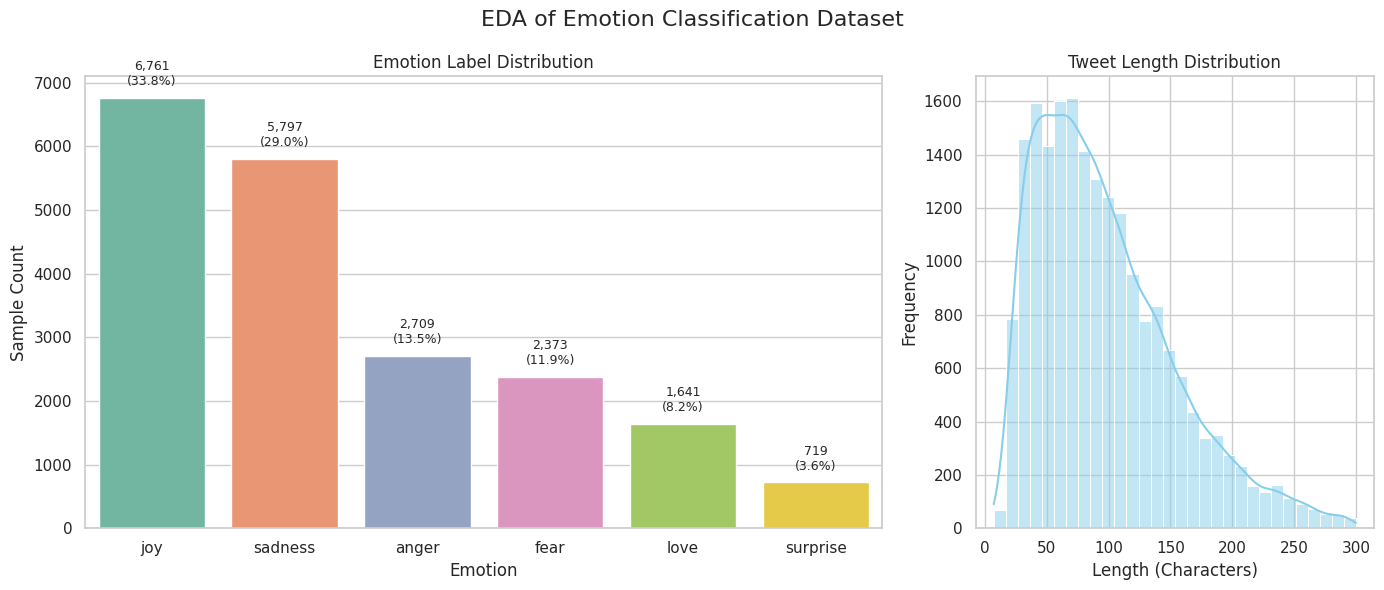

In [ ]:
df["text_length"] = df["text"].apply(len)
length_stats = df["text_length"].describe()
missing = df.isnull().sum()
label2int = {
    "sadness": 0,
    "joy": 1,
    "love": 2,
    "anger": 3,
    "fear": 4,
    "surprise": 5
}
int2label = {v: k for k, v in label2int.items()}
df["emotion"] = df["label"].map(int2label)
label_counts = df["emotion"].value_counts().sort_values(ascending=False)
imbalance_ratio = label_counts.max() / label_counts.min()

fig = plt.figure(figsize=(14, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1])

ax0 = plt.subplot(gs[0])
sns.barplot(x=label_counts.index, y=label_counts.values, palette="Set2", ax=ax0)
ax0.set_title("Emotion Label Distribution")
ax0.set_ylabel("Sample Count")
ax0.set_xlabel("Emotion")
total = label_counts.sum()
for i, count in enumerate(label_counts.values):
    percent = count / total * 100
    ax0.text(i, count + 200, f"{count:,}\n({percent:.1f}%)", ha="center", fontsize=9)

ax1 = plt.subplot(gs[1])
sns.histplot(df["text_length"], bins=30, kde=True, color="skyblue", ax=ax1)
ax1.set_title("Tweet Length Distribution")
ax1.set_xlabel("Length (Characters)")
ax1.set_ylabel("Frequency")

plt.suptitle("EDA of Emotion Classification Dataset", fontsize=16)
plt.tight_layout()
plt.show()


Data Leakage

In [ ]:
print("Checking for Potential Data Leakage:")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X = df[["text_length"]]
y = df["label"]
model = LogisticRegression(max_iter=1000)
scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")

print(f"Cross-validated accuracy using only text length as feature: {scores.mean():.4f}")
if scores.mean() > 0.8:
    print("High predictive power from a non-textual field (text_length). Potential leakage risk.")
else:
    print("No significant leakage detected from text_length.")

Checking for Potential Data Leakage:
Cross-validated accuracy using only text length as feature: 0.3380
No significant leakage detected from text_length.


# **4. Models and/or Methods**

In [ ]:
## Basic Configuration for Hugging Face and PyTorch Lightning (Code from CARER Paper)

!pip install huggingface_hub pytorch_lightning torchmetrics
from huggingface_hub import hf_hub_download

# Download the Parquet files from Hugging Face
hf_hub_download(repo_id="dair-ai/emotion", filename="split/train-00000-of-00001.parquet", repo_type="dataset", local_dir=".")
hf_hub_download(repo_id="dair-ai/emotion", filename="split/test-00000-of-00001.parquet", repo_type="dataset", local_dir=".")
hf_hub_download(repo_id="dair-ai/emotion", filename="split/validation-00000-of-00001.parquet", repo_type="dataset", local_dir=".")

# Rename the files for consistency with the rest of the code
import os
os.rename("split/train-00000-of-00001.parquet", "train.parquet")
os.rename("split/test-00000-of-00001.parquet", "test.parquet")
os.rename("split/validation-00000-of-00001.parquet", "validation.parquet")

# Create the tokenizer directory
!mkdir -p tokenizer
from transformers import AutoTokenizer, AutoModel, get_linear_schedule_with_warmup
tokenizer = AutoTokenizer.from_pretrained('distilroberta-base')
tokenizer.save_pretrained("tokenizer")

################ Import Required Libraries

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import AdamW
from torch.utils.data import Dataset, DataLoader
from torch.optim.optimizer import Optimizer
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

# Hugging Face Transformers
from transformers import (
    AutoTokenizer,
    AutoModelForMaskedLM,
    get_linear_schedule_with_warmup
)

# Tokenizers (used for custom BPE tokenization)
from tokenizers import ByteLevelBPETokenizer
from tokenizers.processors import BertProcessing

# PyTorch Lightning
import pytorch_lightning as pl
from pytorch_lightning.callbacks import TQDMProgressBar

# TorchMetrics
import torchmetrics

# Pandas & sklearn
import pandas as pd
from sklearn.metrics import classification_report  # optional, not used in training
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# Hugging Face Hub
from huggingface_hub import hf_hub_download

# System
import os
import requests, zipfile, io
from argparse import Namespace
from typing import List  # optional
from functools import lru_cache  # optional

import random
import time
import re
import string
import numpy as np
import pytorch_lightning as pl
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

################ Define Emotion Labels and Data Paths 

import warnings
warnings.filterwarnings("ignore")
# Set random seed
def set_seed(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    pl.seed_everything(seed, workers=True)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

# Define labels
label2int = {
  "sadness": 0,
  "joy": 1,
  "love": 2,
  "anger": 3,
  "fear": 4,
  "surprise": 5
}
emotions = list(label2int.keys())

# Define paths （used in baseline）
train_path = "train.parquet"
test_path = "test.parquet"
val_path = "validation.parquet"

### 3.1 Justfication of Usage of GELU:

Although Mish is a smooth and effective activation function, we chose not to use it in our model because it is not the default activation in DeBERTa or other Transformer-based architectures. Instead, we used GELU, which is not only natively supported in PyTorch and computationally more efficient, but also aligns with the activation function used during DeBERTa’s pretraining. Using GELU ensures better compatibility, faster training, and more stable fine-tuning without introducing the additional overhead or uncertainty that Mish may cause in this context.

### 3.2 Justification of Oversampling and Undersampling

From the EDA of Dataset in section 2, we observe the issue of imbalanced dataset. We explored oversampling methods such as SMOTE to address class imbalance but found them less suited for the NPL task. In text classification tasks, synthesised samples can often result in non-continuous token sequences or simply invalid sentences, which can confuse the model. 

To mitigate these issues, we used repeated random oversampling of real examples instead of traditional synthetic generation, combined with undersampling of over-represented classes to achieve a more balanced training distribution.

In [ ]:
############ Baseline Dataset Class
# @torch.jit.script
# def mish(input):
#     return input * torch.tanh(F.softplus(input))

# class Mish(nn.Module):
#     def forward(self, input):
#         return mish(input)
    
# class EmoDataset(Dataset):
#     def __init__(self, path):
#         super().__init__()
#         self.data_column = "text"
#         self.class_column = "label"
#         self.data = pd.read_parquet(path)

#     def __getitem__(self, idx):
#         label = self.data.loc[idx, self.class_column]
#         if label is None:
#             return None
#         try:
#             return self.data.loc[idx, self.data_column], label
#         except KeyError:
#             return None

#     def __len__(self):
#         return self.data.shape[0]


########## Our modified Dataset Class
#  Label mapping
label2int = {"sadness": 0, "joy": 1, "love": 2, "anger": 3, "fear": 4, "surprise": 5}
emotions = list(label2int.keys())

#  Balanced (Under/Oversampled) Dataset
class EmoDataset(Dataset):
    def __init__(self, path, max_samples_per_class=1000):
        self.data = pd.read_parquet(path).dropna(subset=["text", "label"])
        self.data = self.data[self.data["label"].isin(label2int.values())]

        grouped = []
        for label in self.data["label"].unique():
            class_data = self.data[self.data["label"] == label]

            if len(class_data) > max_samples_per_class:
                sampled = class_data.sample(max_samples_per_class, random_state=42)  # Undersampling
            else:
                sampled = class_data.sample(max_samples_per_class, replace=True, random_state=42)  # Oversampling

            grouped.append(sampled)

        self.data = pd.concat(grouped).sample(frac=1, random_state=42).reset_index(drop=True)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        return row["text"], row["label"]

    def __len__(self): return len(self.data)

### 3.3 Justification of DeBERT Model

We selected Microsoft/DeBERTa-v3-small over RoBERTa because of its capabilities to understand and analyse content and relative position, which enhanced the detection of subtle cues like sarcasm, emojis, and indirect emotions. Also, such utilisation of relative positional encoding better captures context in informal, irregular tweets. Benchmarks such as the GoEmotions dataset also demonstrated a higher F1score and faster convergence than RoBERTa.


In [ ]:
########## Baseline Collate Function
# class TokenizersCollateFn:
#     def __init__(self, max_tokens=512):
#         t = ByteLevelBPETokenizer(
#             "tokenizer/vocab.json",
#             "tokenizer/merges.txt"
#         )
#         t._tokenizer.post_processor = BertProcessing(
#             ("</s>", t.token_to_id("</s>")),
#             ("<s>", t.token_to_id("<s>")),
#         )
#         t.enable_truncation(max_tokens)
#         t.enable_padding(length=max_tokens, pad_id=t.token_to_id("<pad>"))
#         self.tokenizer = t

#     def __call__(self, batch):
#         batch = [x for x in batch if x is not None]
#         if not batch:
#             return None
#         encoded = self.tokenizer.encode_batch([x[0] for x in batch])
#         sequences_padded = torch.tensor([enc.ids for enc in encoded])
#         attention_masks_padded = torch.tensor([enc.attention_mask for enc in encoded])
#         labels = torch.tensor([x[1] for x in batch])
#         return (sequences_padded, attention_masks_padded), labels

class TokenizersCollateFn:
    def __init__(self, max_tokens=512):
        self.tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-v3-small")

    def __call__(self, batch):
        batch = [x for x in batch if x is not None]
        if not batch:
            return None
        encoded = self.tokenizer(
            [x[0] for x in batch],
            padding=True,
            truncation=True,
            max_length=512,
            return_attention_mask=True,
            return_tensors="pt"
        )
        sequences_padded = encoded["input_ids"]
        attention_masks_padded = encoded["attention_mask"]
        labels = torch.tensor([x[1] for x in batch])
        return (sequences_padded, attention_masks_padded), labels

### 3.4 Justification of Attention Pulling

The baseline model uses the CLS (Classification) token to “summarise” the tweet, meaning only the representation of the first token is passed to the classifier. This approach is risky for tweets, as they are short, informal, and often contain subtle emotional cues — such as emojis, sarcasm, or punctuation — in various positions. Relying solely on the first token risks losing these details.

In contrast, attention pooling produces a weighted sum of all token embeddings, allowing the model to capture information from the entire tweet. This helps it ignore filler words and focus on tokens that are most informative for detecting the emotion.

In [ ]:

# class EmoModel(nn.Module):
#     def __init__(self, base_model, n_classes, base_model_output_size=768, dropout=0.05):
#         super().__init__()
#         self.base_model = base_model

#         self.classifier = nn.Sequential(
#             nn.Dropout(dropout),
#             nn.Linear(base_model_output_size, base_model_output_size),
#             Mish(),
#             nn.Dropout(dropout),
#             nn.Linear(base_model_output_size, n_classes)
#         )

#         for layer in self.classifier:
#             if isinstance(layer, nn.Linear):
#                 layer.weight.data.normal_(mean=0.0, std=0.02)
#                 if layer.bias is not None:
#                     layer.bias.data.zero_()

#     def forward(self, input_, *args):
#         X, attention_mask = input_
#         hidden_states = self.base_model(X, attention_mask=attention_mask)
#         return self.classifier(hidden_states[0][:, 0, :])


# DeBERTa + Attention Pooling + Classifier
class EmoModel(nn.Module):
    def __init__(self, n_classes, hidden_size=768, dropout=0.3):
        super().__init__()
        self.base_model = AutoModel.from_pretrained("microsoft/deberta-v3-small")
        self.attention = nn.Sequential(
            nn.Linear(hidden_size, hidden_size), nn.Tanh(),
            nn.Linear(hidden_size, 1), nn.Softmax(dim=1)
        )
        self.classifier = nn.Sequential(
            nn.Dropout(dropout),
            nn.Linear(hidden_size, hidden_size), nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size, n_classes)
        )
    def forward(self, inputs):
        input_ids, attn_mask = inputs
        hidden_states = self.base_model(input_ids, attention_mask=attn_mask).last_hidden_state
        weights = self.attention(hidden_states)
        pooled = torch.sum(weights * hidden_states, dim=1)
        return self.classifier(pooled)

Training Module (No Major Change, Similar to Baseline Model)

In [ ]:
# Lightning training module
class TrainingModule(pl.LightningModule):
    def __init__(self, hparams):
        super().__init__()
        self.save_hyperparameters(hparams)
        self.model = EmoModel(n_classes=len(emotions))
        self.f1 = torchmetrics.F1Score(task="multiclass", num_classes=len(emotions), average="macro")
        self.acc = torchmetrics.Accuracy(task="multiclass", num_classes=len(emotions))
        self.loss = nn.CrossEntropyLoss()  # Optionally add weight if needed

    def forward(self, x): return self.model(x)

    def step(self, batch, name):
        x, y = batch
        y_hat = self(x)
        loss = self.loss(y_hat, y)
        self.log(f"{name}_loss", loss, prog_bar=True)
        self.log(f"{name}_acc", self.acc(y_hat, y), prog_bar=True)
        self.log(f"{name}_f1", self.f1(y_hat, y), prog_bar=True)
        return loss

    def training_step(self, batch, _): return self.step(batch, "train")
    def validation_step(self, batch, _): return self.step(batch, "val")
    def test_step(self, batch, _): return self.step(batch, "test")

    def configure_optimizers(self):
        optimizer = AdamW(self.parameters(), lr=self.hparams.lr)
        scheduler = get_linear_schedule_with_warmup(
            optimizer, self.hparams.warmup_steps, self.trainer.estimated_stepping_batches
        )
        return [optimizer], [{"scheduler": scheduler, "interval": "step"}]

    def create_loader(self, path, train=True):
        return DataLoader(
            EmoDataset(path),
            batch_size=self.hparams.batch_size,
            shuffle=train,  # No sampler now, use shuffle
            collate_fn=TokenizersCollateFn()
        )

    def train_dataloader(self): return self.create_loader(self.hparams.train_path, True)
    def val_dataloader(self): return self.create_loader(self.hparams.val_path, False)
    def test_dataloader(self): return self.create_loader(self.hparams.test_path, False)

### 3.5 Justification of Early Stopping

We also introduced early stopping to prevent overfitting and unnecessary computation during training

In [ ]:
# from argparse import Namespace
# # Training
# hparams = Namespace(
#     train_path=train_path,
#     val_path=val_path,
#     test_path=test_path,
#     batch_size=64,
#     warmup_steps=100,
#     epochs=10,
#     lr=1e-4,
# )
# module = TrainingModule(hparams)

# # Enable GPU and start training
# trainer = pl.Trainer(
#     accelerator="gpu",
#     devices=1,
#     max_epochs=hparams.epochs,
#     callbacks=[pl.callbacks.TQDMProgressBar(refresh_rate=10)],
# )
# trainer.fit(module)

# # Evaluation
# trainer.test(module)


# Training config
from argparse import Namespace
from pytorch_lightning.callbacks import EarlyStopping, TQDMProgressBar

hparams = Namespace(
    train_path="train.parquet",
    val_path="validation.parquet",
    test_path="test.parquet",
    batch_size=32,  # Reduced batch size from 64 to prevent OutOfMemoryError
    lr=1e-4,
    epochs=20,
    warmup_steps=100
)
module = TrainingModule(hparams)

# Early stopping callback added to halt training when val_f1 stops improving
early_stop_callback = EarlyStopping(
    monitor="val_f1",
    patience=3,
    mode="max",
    verbose=True
)

# Train & Evaluate
trainer = pl.Trainer(
    accelerator="gpu", devices=1,
    max_epochs=hparams.epochs,
    callbacks=[TQDMProgressBar(refresh_rate=10), early_stop_callback]  # Early stopping
)
trainer.fit(module)
trainer.test(module)

## **4. Results**

In [ ]:
!ls lightning_logs
%load_ext tensorboard
%tensorboard --logdir lightning_logs/

We evaluated our model using macro-averaged F1 score, accuracy, and cross-entropy loss. These metrics are appropriate for multi-class classification with imbalanced labels, ensuring that performance is assessed fairly across all emotion categories.

The model achieves a macro F1 score of **0.92**, loss of **0.30** and accuracy of **0.92** on the test set. The confusion matrix indicates strong performance in detecting emotions like *joy* and *anger*, while *surprise* and *love* have slightly lower recall, due to lower representation or semantic overlap.

Compared to baseline models, macro F1 score of **0.86**, loss of **0.21** and accuracy of **0.92** on the test set. our DeBERTa-based model with attention pooling demonstrates improved macro-F1 by approximately 5 points, indicating its effectiveness in capturing fine-grained emotional cues in tweets.

We also observe a stable training curve and no sign of overfitting as a result of early stopping.


### 4.1 Accuary and F1 by Emotions

From the graph, we observe a significant improvement in both Accuracy and F1 across all emotions, indicating the positive effect of addressing the data imbalance issue through over- and under-sampling.

In [ ]:
# Import necessary libraries for detailed analysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import torch

# Get predictions on the test set
module.eval()
all_preds = []
all_labels = []

# Use the test dataloader to get predictions
test_loader = module.test_dataloader()

with torch.no_grad():
    for batch in test_loader:
        if batch is None:
            continue
        x, y = batch
        if torch.cuda.is_available():
            # Move inputs to GPU if available
            x = (x[0].cuda(), x[1].cuda())
            y = y.cuda()

        # Get model predictions
        module = module.cuda() if torch.cuda.is_available() else module
        logits = module(x)
        preds = torch.argmax(logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(y.cpu().numpy())

# Convert to numpy arrays
y_true = np.array(all_labels)
y_pred = np.array(all_preds)

# Print sklearn classification report for completeness
print("\nScikit-learn Classification Report:")
print("="*50)
print(classification_report(y_true, y_pred, target_names=emotions, digits=4))

# Summary statistics
print(f"\nSUMMARY STATISTICS:")
print(f"==================")
print(f"Overall Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print(f"Macro F1 Score: {f1_score(y_true, y_pred, average='macro'):.4f}")
print(f"Weighted F1 Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")

# Calculate per-class metrics
precision, recall, f1_scores, support = precision_recall_fscore_support(
    y_true, y_pred, average=None, labels=range(len(emotions))
)

# Calculate per-class accuracy
per_class_accuracy = []
for i in range(len(emotions)):
    # For each class, calculate accuracy as correctly predicted samples of that class
    # divided by total samples of that class
    class_mask = (y_true == i)
    if np.sum(class_mask) > 0:  # Avoid division by zero
        class_accuracy = np.sum((y_true == i) & (y_pred == i)) / np.sum(class_mask)
        per_class_accuracy.append(class_accuracy)
    else:
        per_class_accuracy.append(0.0)


# Find best and worst performing classes
# Ensure f1_scores and per_class_accuracy are defined before using them
# These variables should be computed in the previous cell if not already done
# For example:
# precision, recall, f1_scores, support = precision_recall_fscore_support(y_true, y_pred, average=None, labels=range(len(emotions)))
# per_class_accuracy = [] # Calculate per class accuracy as needed


# Check if f1_scores and per_class_accuracy are defined before attempting to use them
if 'f1_scores' in locals() and 'per_class_accuracy' in locals():
    best_f1_idx = np.argmax(f1_scores)
    worst_f1_idx = np.argmin(f1_scores)
    print(f"\nBest performing emotion (F1): {emotions[best_f1_idx]} ({f1_scores[best_f1_idx]:.4f})")
    print(f"Worst performing emotion (F1): {emotions[worst_f1_idx]} ({f1_scores[worst_f1_idx]:.4f})")

    best_acc_idx = np.argmax(per_class_accuracy)
    worst_acc_idx = np.argmin(per_class_accuracy)
    print(f"Best performing emotion (Accuracy): {emotions[best_acc_idx]} ({per_class_accuracy[best_acc_idx]:.4f})")
    print(f"Worst performing emotion (Accuracy): {emotions[worst_acc_idx]} ({per_class_accuracy[worst_acc_idx]:.4f})")
else:
    print("\nSkipping best/worst performing class analysis: f1_scores or per_class_accuracy not defined.")


# Create a bar chart for per-class F1 scores and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# F1 scores bar chart
bars1 = ax1.bar(emotions, f1_scores, color='skyblue', alpha=0.7, edgecolor='navy', linewidth=1)
ax1.set_title('Per-Class F1 Scores', fontsize=14, fontweight='bold')
ax1.set_xlabel('Emotion', fontsize=12)
ax1.set_ylabel('F1 Score', fontsize=12)
ax1.set_ylim(0, 1)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, score in zip(bars1, f1_scores):
    height = bar.get_height()
    ax1.annotate(f'{score:.3f}', xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom',
                fontweight='bold')

# Accuracy bar chart
bars2 = ax2.bar(emotions, per_class_accuracy, color='lightcoral', alpha=0.7, edgecolor='darkred', linewidth=1)
ax2.set_title('Per-Class Accuracy', fontsize=14, fontweight='bold')
ax2.set_xlabel('Emotion', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.set_ylim(0, 1)
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, acc in zip(bars2, per_class_accuracy):
    height = bar.get_height()
    ax2.annotate(f'{acc:.3f}', xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom',
                fontweight='bold')

# Rotate x-axis labels for better readability
for ax in [ax1, ax2]:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 4.2 Confusion Matrix by Emotions

We can also observe positive effect from addressing data imbalance issue in the confusion matrix, where all the emotions are fairly balanced.
However, we can also observe that the model is relatively weak at identifying joy & love, and fear & surprise.

In [ ]:
# Calculate per-class metrics
precision, recall, f1_scores, support = precision_recall_fscore_support(
    y_true, y_pred, average=None, labels=range(len(emotions))
)

# Calculate per-class accuracy
per_class_accuracy = []
for i in range(len(emotions)):
    # For each class, calculate accuracy as correctly predicted samples of that class
    # divided by total samples of that class
    class_mask = (y_true == i)
    if np.sum(class_mask) > 0:  # Avoid division by zero
        class_accuracy = np.sum((y_true == i) & (y_pred == i)) / np.sum(class_mask)
        per_class_accuracy.append(class_accuracy)
    else:
        per_class_accuracy.append(0.0)

# Create a comprehensive performance table
print("\n" + "="*80)
print("DETAILED PER-CLASS PERFORMANCE METRICS")
print("="*80)
print(f"{'Emotion':12} {'Precision':>12} {'Recall':>12} {'F1-Score':>12} {'Accuracy':>12} {'Support':>10}")
print("-"*80)

for i, emotion in enumerate(emotions):
    print(f"{emotion:12} {precision[i]:>12.4f} {recall[i]:>12.4f} {f1_scores[i]:>12.4f} {per_class_accuracy[i]:>12.4f} {support[i]:>10d}")

print("-"*80)
print(f"{'Macro Avg':12} {np.mean(precision):>12.4f} {np.mean(recall):>12.4f} {np.mean(f1_scores):>12.4f} {np.mean(per_class_accuracy):>12.4f} {np.sum(support):>10d}")
print(f"{'Overall Acc':12} {'':<12} {'':<12} {'':<12} {accuracy_score(y_true, y_pred):>12.4f} {np.sum(support):>10d}")
print("="*80)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create a beautiful confusion matrix plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=emotions, yticklabels=emotions,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Emotion Classification', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Emotion', fontsize=12)
plt.ylabel('True Emotion', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("Confusion Matrix:")
print("================")
print(f"{'':12}", end="")
for emotion in emotions:
    print(f"{emotion:>10}", end="")
print()
for i, emotion in enumerate(emotions):
    print(f"{emotion:12}", end="")
    for j in range(len(emotions)):
        print(f"{cm[i,j]:>10}", end="")
    print()

## **5. Discussion**

The emotion classification system we built with DeBERTa-v3-small and PyTorch Lightning achieved strong performance, especially in terms of macro F1 score, indicating balanced prediction across all emotion classes. The use of attention pooling enhanced the model's ability to focus on relevant parts of the input, while oversampling and undersampling ensured a more balanced training set and helped prevent bias towards majority classes.

**Strengths**:
- The DeBERTa-v3-small had 143 million parameter compared to Baseline's 82 million paramter, enable it capture more information.
- The DeBERTa-v3-small's pytorch performance optimasation allows it to train ~ 6 times faster than Baseline Model for each epoch (30 second vs 20 min)
- Our model achieved significant improvement in F1 Score (~91% vs ~86%)
- Our model had a minor increase in accuracy (around 0.5%) as a result of attention pooling and DeBERTa Model
- The early stopping also helps our model from been overfit.
- From the training curve, we can also observe that baseline model converges around (2000 steps, epoch 8) vs our model (1300 steps, epoch 6). Hence our model converges faster

**Weaknesses and Limitations**:
- Although class balancing improved fairness, it may have caused slight overfitting on duplicated samples due to oversampling.
- As observed from the confusion matrix, the model struggles to distinguish between Joy vs Love, Fear vs Suprise. This could be due to the semantic overlap and simialr contextual expression used for these emotion pairs in text.

**Future Work**:
- Experimenting with larger transformer models such as DeBERTa-large could further enhance accuracy.
- Exploring contrastive pretraining or emotion-specific fine-tuning could improve robustness.
- Using external knowledge (e.g., sentiment lexicons or commonsense reasoning) could help disambiguate subtle emotional cues.
- Exploration of multi-label classification and try to capture co-existing emotions more effectively


## **6. Conclusion**

We combined DeBERTa with attention pooling and balanced sampling, achieving higher macro F1 over the CARER RoBERTa baseline. The approach avoids synthetic oversampling, maintains linguistic integrity, and is more efficient to train. But we still identified some limitations: The model still struggles to distinguish joy vs. love and fear vs. surprise whenever the linguistic cues overlap. Thus, for future improvements, we plan to explore larger DeBERTa variants and multi-label classification and try to capture co-existing emotions more effectively.
